**Name: Osama Sidahmed**

**Capstone project: Detecting and Predicting Seizure Onset**

**Date Submitted: 11 Apr 2021**

**Notebook: 1_Initial_EDA**

**Notebook order: 1/4**

**Following notebooks: `2_Features_Extraction`, `3_Modelling_Detection` and `4_Modelling_Prediction`**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Datasets" data-toc-modified-id="Datasets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Datasets</a></span></li><li><span><a href="#Datasets-folders-structure" data-toc-modified-id="Datasets-folders-structure-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Datasets folders structure</a></span></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Explore the data</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Introduction

This exciting capstone project is trying to address few problems:
- Seizure patients do not know when their next seizure attack is going to happen so that they prepare for it by stopping all activities and stay in a safe place where they can get help from others if required.
- Caregivers do not know when patients get seizure, for instance in long-term health facilities where 4% of the residents in Canada (according to Stats Canada) suffer epilepsy.
- Hospitals and medical institutions depend on manual EEG labeling making the process dependent on the technician's and the doctor's skill. While this may not be a big concern in developed countries, it may still be a challenge in developing countries.
- In the future, we should not be in need of complex and expensive EEG machines, probably the doctor can set up  electrodes sending data to his laptop while doing diagnosis!

This project is aiming to predict and detect seizure onset in real-time using real-time data. Although it can be used for that it is not meant for after-the-fact analysis like many research papers, this makes the classification problem more challenging as the observation size will have to be small enough to enable detecting the seizure as fast as possible and big enough to allow for real-time processing as it will be explained later.

The main limitation of this project is that it is not a complete product meaning that it needs input from EEG acquisition systems for it to work to produce output, but it is a step towards solving an important problem! 

This file demonstrates the initial EDA done on the **raw** data before the features were extracted. EDA on data after the features were extracted are not part of this notebook but are included on the notebook `2_Features_Extraction` to respect the work chronological order.

 # Datasets

Dataset_1: [Siena Scalp EEG Database](https://physionet.org/content/siena-scalp-eeg/1.0.0/): a set of EEG recordings of 14 patients acquired at the Unit of Neurology and Neurophysiology of the University of Siena in Italy.

Dataset_2: [CHB-MIT Scalp EEG Database](https://physionet.org/content/chbmit/1.0.0/): recordings collected at the Children’s Hospital Boston, consists of EEG recordings from pediatric subjects with intractable seizures.

# Datasets folders structure

Two data sets have been used in this capstone project, the first dataset denoted as dataset_1 follows this structure:
- Every patient files are stored in a different folder etc PN00 is a patient, PN01 is another patient and so on and so forth.
- Inside every patient folder are the EEG recording files in .edf format, each file contain at least one seizure (in most cases), the file `Seizures-list-<patient>` is a registry for the seizure time stamps for that patient.

The first dataset denoted as dataset_2 follows a similar structure.

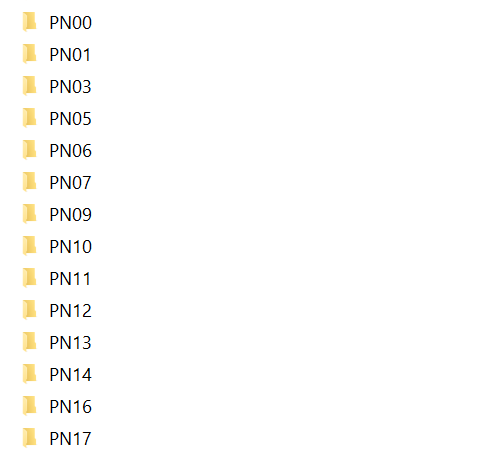



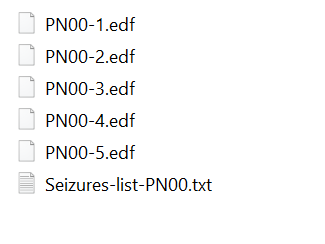


In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# MNE is a library used for brain data manipulation -
# Open-source Python package for exploring, visualizing, and analyzing human neurophysiological data
# https://mne.tools/stable/index.html
import mne

# Explore the data

The data I acquired from [physionet.org](https://physionet.org/) is in `edf` format. This data format is new to me.

According to https://www.edfplus.info, this format is a standard files format for exchange and storage of multichannel biological and physical signals such as Electroencephalography (EEG) data. EEG data is the the subject of my problem, epilepsy brain data is stored are EEG data. 
Every file contains one uninterrupted digitized polygraphic recording. A data file consists of a header record followed by data records. The variable-length header record identifies the patient and specifies the technical characteristics of the recorded signals. The data records contain consecutive fixed-duration epochs of the polygraphic recording.

To read this file format in python a certain library is required. There are many libraries that can be used to read and analyze this file format,[ MNE](https://mne.tools/stable/install/index.html) is the most popular one.

Now let us read one file and see how it looks like...

The following code will read the file from the directory and store it in a `rawEDF` object.

In [2]:
# Read file using mne.io.read_raw_edf
# 'data/<dataset>/<patient>/<file>'
file_path = 'data/dataset_1/PN00/PN00-1.edf'
raw_data = mne.io.read_raw_edf(file_path)

Extracting EDF parameters from C:\Users\omass\1 BrainStation\capstone\data\dataset_1\PN00\PN00-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
# What is the object type?
raw_data

<RawEDF | PN00-1.edf, 35 x 1344000 (2625.0 s), ~38 kB, data not loaded>

Now let use try to visualize the file

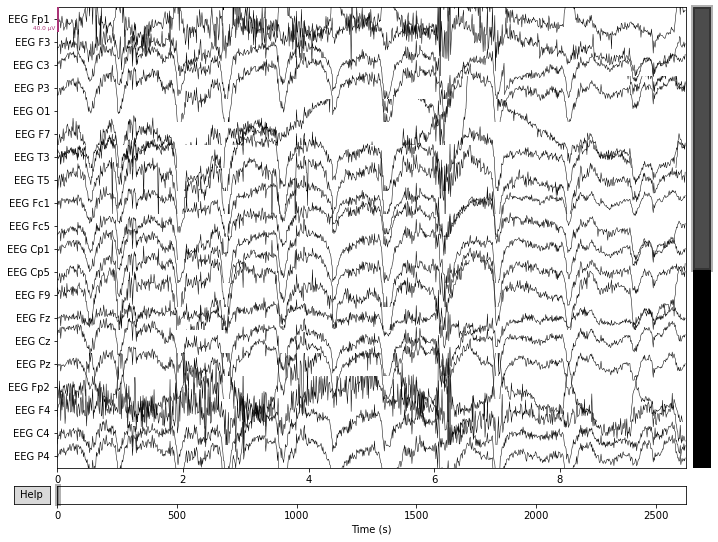

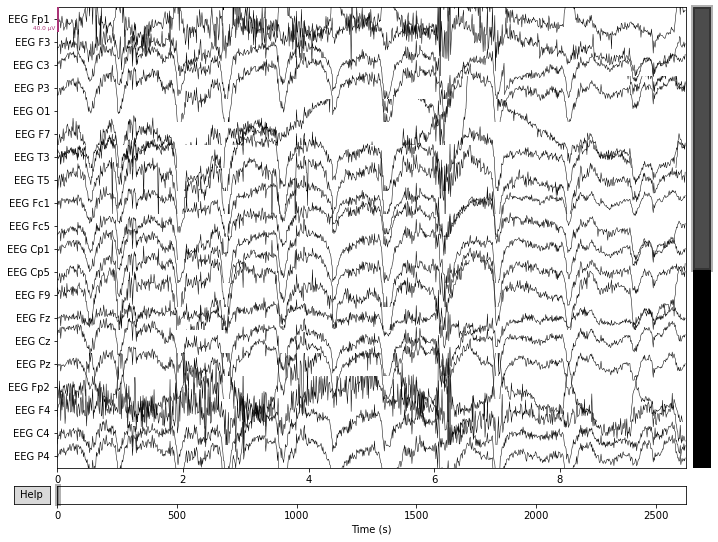

In [4]:
raw_data.plot()

Does look right, how can we make this plot look better?

if we use `%matplotlib`, we will be able to get the graph in an interactive mode.

Using matplotlib backend: Qt5Agg


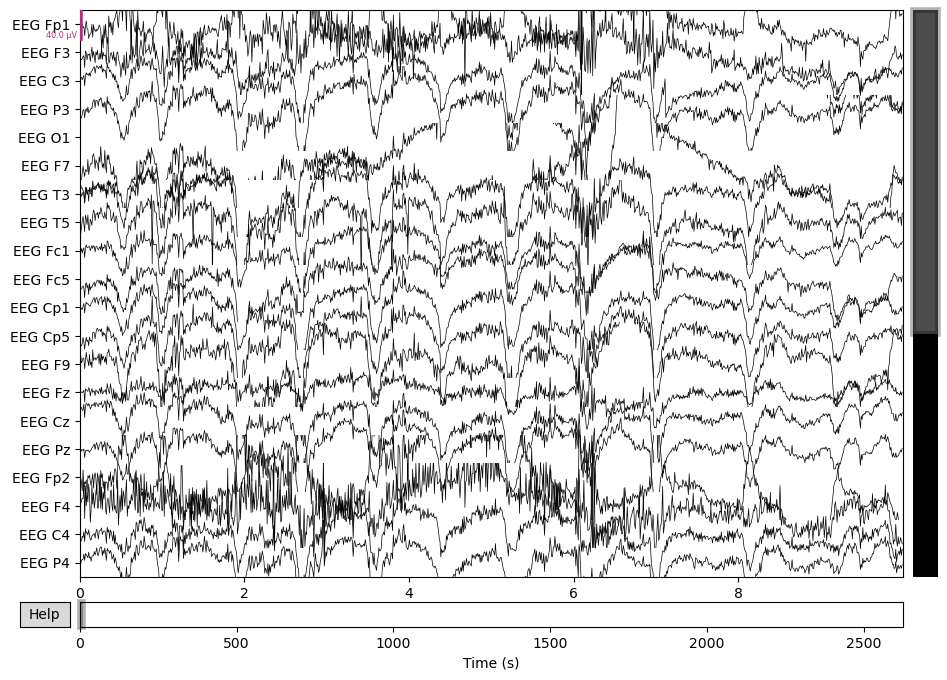

Channels marked as bad: none


In [6]:
# a new window will popup
%matplotlib
raw_data.plot()

We can see the following:

- There are many channels stacked on the y-axis, every channel represents an electrode placed at a specific position on the scalp, the naming and the placement follows the international league against epilepsy standard.
- The x-axis is the time in seconds, each file start at 0 sec, 2500 sec represent ~42 minuted.
- The channel measurement is in micro-volt except for non-brain bio data channels such as SO2 (Oxygen level) and HR(Heart rate) both of which seems to have not been recorded.

In [3]:
raw_data.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 19:39:33 UTC
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
>

The `.info` data structure gives the metadata stored in the file including:
- Channel names: EEG Fp1, EEG F3, EEG etc..
- Channel number: 35
- Channel type: EEG
- Sampling frequency: 512 Hz

The channels are going to be our features for to solve the problem on hand.

The complete list of all channel names is:

In [17]:
print(raw_data.ch_names)

['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG Fp2', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10', 'EKG EKG', 'SPO2', 'HR', '1', '2', 'MK']


In [81]:
raw_data['EEG Fp1']

(array([[ 1.875e-06, -3.750e-07, -3.250e-06, ...,  1.625e-05,  1.325e-05,
          8.875e-06]]),
 array([0.00000000e+00, 1.95312500e-03, 3.90625000e-03, ...,
        2.62499414e+03, 2.62499609e+03, 2.62499805e+03]))

As expected every channel data is a combination of two array, values array and a time stamp array.

Let us try to look at the data shape, but first we need to covert it into a numpy array using the `.get_data()` method.

In [10]:
raw_data.get_data().shape

(35, 1344000)

This means we have 35 columns and ~1.3 M rows if we were to tabulate this data! this sounds like a lot of data for a table, and this is only one file, we many more. The reason for this size stems from the fact that sampling rate is 512 Hz, meaning that there are 512 data points recorded for each channel ever sec, 512 Hz * ~2500 sec = ~ 1.3 M data points per channel.

Let us look at the channels values distribution, but before that and due to the file size, we will take a slice and store it in a dataframe and then plot its channels.

In [60]:
# reshape to fit into a dataframe in the right format
sliced_data = raw_data.get_data()
sliced_data_ch_names = np.array(raw_data.ch_names).reshape(
    1, 35)  # 35 is the number of channels in the file
# slice 500000 data points = 500000/512 = ~15 minutes at an arbitrary point
sliced_data = np.array(sliced_data[0:36, 100000:500000])
sliced_data = np.transpose(sliced_data)
# Store in a dataframe
df_sliced_data = pd.DataFrame(
    data=sliced_data, columns=np.transpose(sliced_data_ch_names))
df_sliced_data.head(3)

,"(EEG Fp1,)","(EEG F3,)","(EEG C3,)","(EEG P3,)","(EEG O1,)","(EEG F7,)","(EEG T3,)","(EEG T5,)","(EEG Fc1,)","(EEG Fc5,)",...,"(EEG Fc6,)","(EEG Cp2,)","(EEG Cp6,)","(EEG F10,)","(EKG EKG,)","(SPO2,)","(HR,)","(1,)","(2,)","(MK,)"
0,0.000064,-6.250000e-07,-0.000046,-0.000047,-0.000061,-0.000009,-0.000042,-0.000043,-0.000040,-0.000032,...,-0.000027,-0.000048,-0.000049,-0.000053,0.008738,0.0,0.0,-0.000054,-0.000170,0.00004
1,0.000056,-5.375000e-06,-0.000048,-0.000048,-0.000063,-0.000013,-0.000044,-0.000044,-0.000041,-0.000034,...,-0.000044,-0.000050,-0.000054,-0.000048,0.008738,0.0,0.0,-0.000057,-0.000182,0.00004
2,0.000054,-1.225000e-05,-0.000046,-0.000044,-0.000055,-0.000012,-0.000041,-0.000040,-0.000041,-0.000032,...,-0.000041,-0.000047,-0.000050,-0.000048,0.008738,0.0,0.0,-0.000063,-0.000184,0.00004


The sliced data has shape of 100,000 rows and 35 columns.

In [61]:
df_sliced_data.shape

(100000, 35)

Let us get the seizure occurrence time from the `Seizures-list-PN00.txt` file as in the following cell.

Seizure n 1
- File name: PN00-1.edf
- Registration start time: 19.39.33
- Registration end time:  20.22.58
- Seizure start time: 19.58.36
- Seizure end time: 19.59.46

Considering the start as time 0, then in seconds after start:
- Seizure start time: 1143 sec
- Seizure end time: 1213 sec

In data index (using the sampling frequency)

- Seizure start time: 1143 * 512 = 585,216
- Seizure end time: 1213 * 512 = 621,056

Let us now make a slice of the data when this an epilepsy.

In [69]:
# reshape to fit into a dataframe in the right format
sliced_data_2 = raw_data.get_data()
sliced_data_2_ch_names = np.array(raw_data.ch_names).reshape(
    1, 35)  # 35 is the number of channels in the file
# slice as per: Seizure start time: 1143 * 512 = 585,216, Seizure end time: 1213 * 512 = 621,056
sliced_data_2 = np.array(sliced_data_2[0:36, 585216:621056])
sliced_data_2 = np.transpose(sliced_data_2)
# Store in a dataframe
df_sliced_data_2 = pd.DataFrame(
    data=sliced_data_2, columns=np.transpose(sliced_data_2_ch_names))
df_sliced_data_2.head(3)

,"(EEG Fp1,)","(EEG F3,)","(EEG C3,)","(EEG P3,)","(EEG O1,)","(EEG F7,)","(EEG T3,)","(EEG T5,)","(EEG Fc1,)","(EEG Fc5,)",...,"(EEG Fc6,)","(EEG Cp2,)","(EEG Cp6,)","(EEG F10,)","(EKG EKG,)","(SPO2,)","(HR,)","(1,)","(2,)","(MK,)"
0,-0.000010,-0.000023,-0.000001,0.000008,8.750000e-07,-0.000071,-0.000019,0.000007,0.000000,-0.000020,...,0.000013,0.000001,-2.500000e-07,0.000005,0.008220,0.0,0.0,-0.000014,-0.000211,0.00004
1,-0.000011,-0.000021,0.000003,0.000010,2.000000e-06,-0.000069,-0.000013,0.000006,0.000002,-0.000015,...,0.000012,0.000003,7.500000e-07,0.000004,0.008235,0.0,0.0,-0.000013,-0.000210,0.00004
2,-0.000013,-0.000021,0.000003,0.000012,5.375000e-06,-0.000069,-0.000008,0.000005,0.000002,-0.000015,...,0.000014,0.000004,1.875000e-06,0.000007,0.008235,0.0,0.0,-0.000027,-0.000216,0.00004


The sliced data has shape of 35,840 rows and 35 columns.

In [75]:
df_sliced_data_2.shape

(35840, 35)

Let us look at the channels values distribution for both non-seizure (df_sliced_data) and seizure (df_sliced_data_2) data.

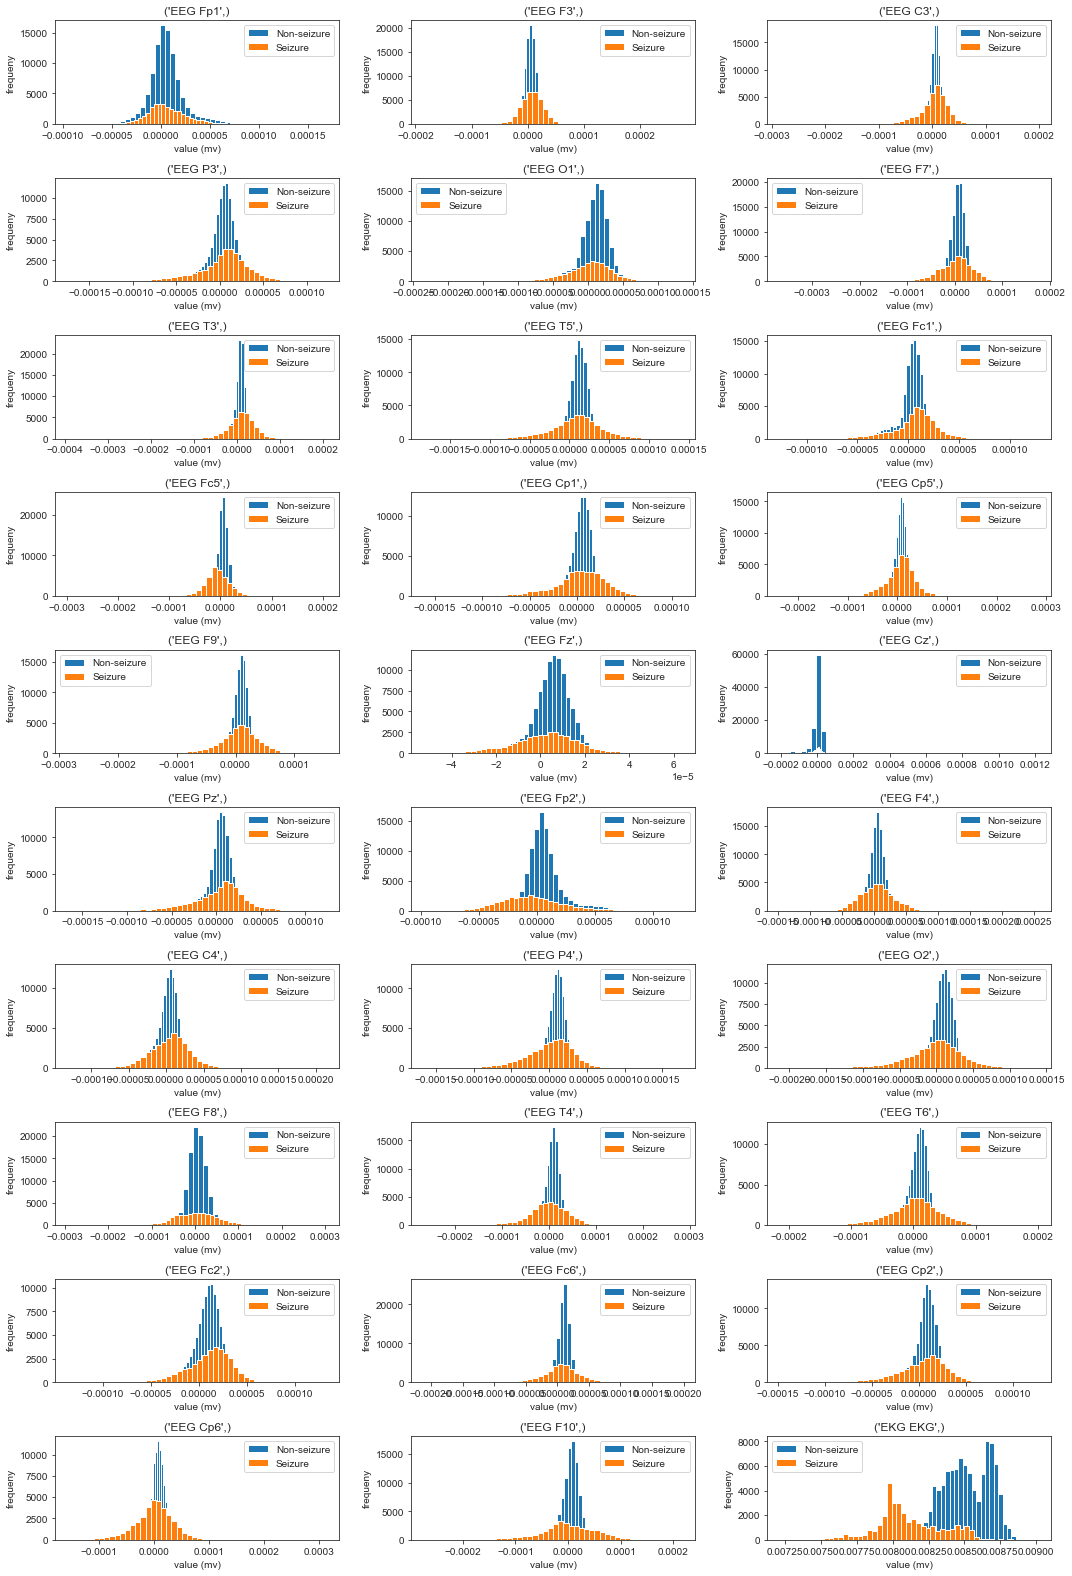

In [78]:
# Features distribution
plt.subplots(10,3, figsize=(15,22))

for i in range(30):
    plt.subplot(10,3, i+1)
    plt.hist(df_sliced_data.iloc[:,i], bins = 50, label='Non-seizure')
    plt.hist(df_sliced_data_2.iloc[:,i], bins = 50, label='Seizure')
    plt.xlabel('value (mv)')
    plt.ylabel('frequeny')
    plt.title(df_sliced_data.columns[i])
    plt.legend()
    
plt.tight_layout()    
plt.show()

This sample seems to follow a normal distribution around a positive number with sum negative milli-volt values, this is expected looking at the mne graphs above. Channel `EEG Cz` has a different distribution and `EKG EKG` has more than one peak, let us look at violin plots.
The `EKG EKG` is the heart rate data for the patients recored during the clinical period.
It seems comparing the brain wave data in the time domain may not result in a measurable separation between the two classes.
It is worth mentioning to say that this is just a snapshot of the dataset, taking the whole dataset is not necessary at this stage.

The following is the non-seizure data as violin plots.

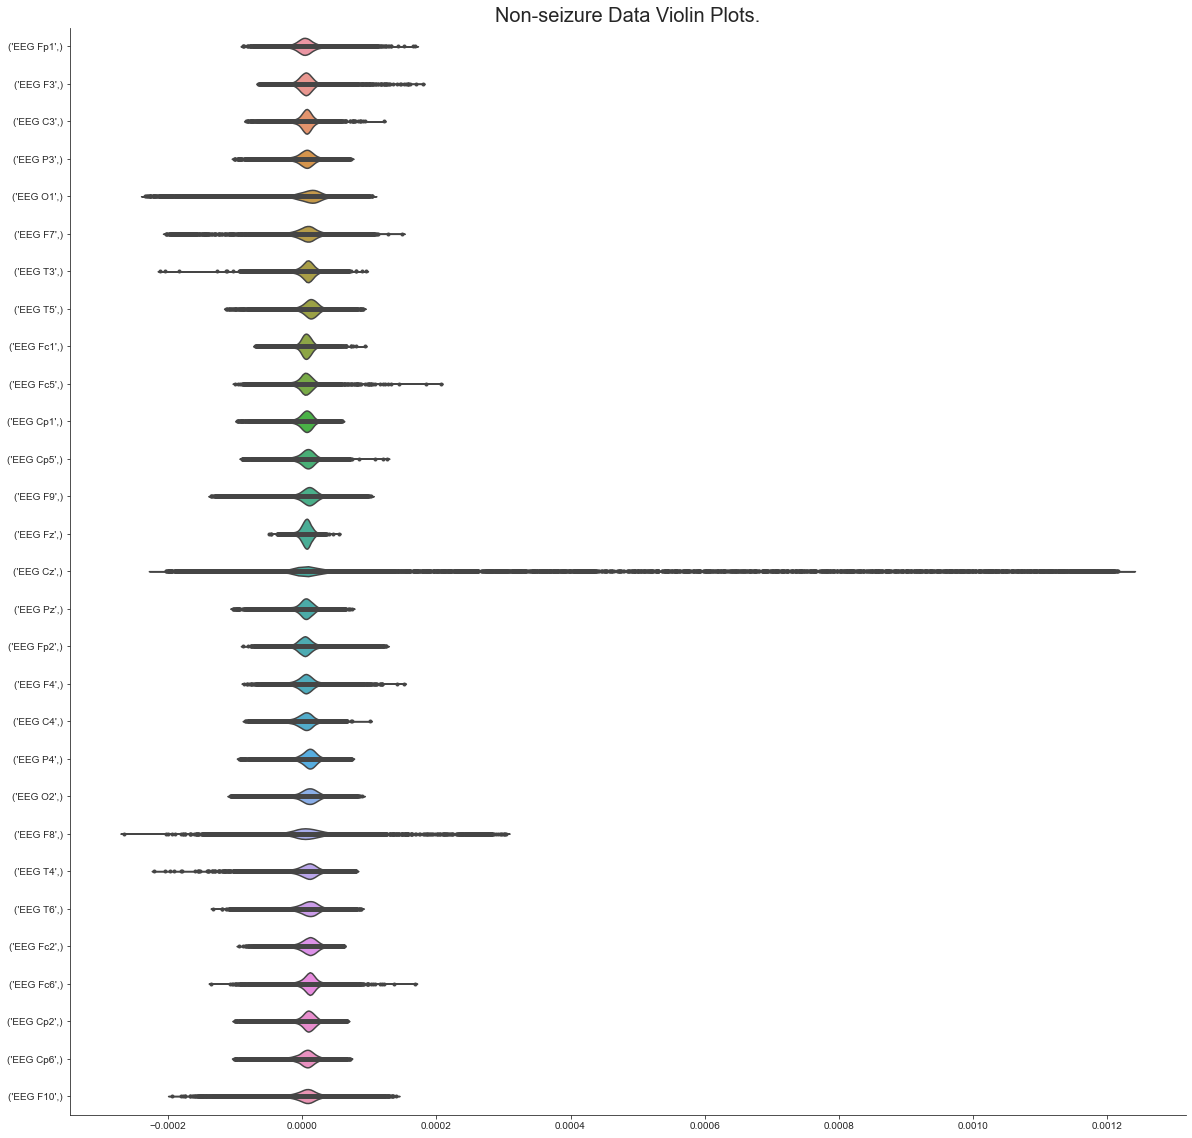

In [98]:
# plot viloin plots
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
plt.title('Non-seizure Data Violin Plots.', size = 20)
sns.violinplot(data=df_sliced_data.iloc[:,0:29], inner='points', orient='h')     
sns.despine()

The channels - except for `EEG Cz` - variability are comparable. This is just a snapshot of the data but it gives a good feel.

It is wroth mentioning that other files on the database where looked at as well in a similar manner, this is not shown here as the work was repetitive with no significant outcome.

# Summary

I tried to store the data into a `csv` file at this stage, just a few minutes slice from the file, the computer did not handle the operation and I gave up this idea as it is not sustainable even if it can be done. Taking into consideration the shear amount of data that I have, I will need to find another way of dealing with the data, a way to extract the features without distorting the content. 

The main takeaways from the initial EDA are:

- The data is in edf format, 16-bit format.
- Every file contains many channels, each channel represent an electrode on the scalp.
- Data is fairly normally distributed.
- Looking at `Seizures-list-<patient>` files, there are more than 60 seizures on dataset_1, data is going to be imbalanced, this is normal on this subject matter as per the academic papers.
- It seems comparing the data in the time domain may not result in a measurable separation between the two classes.
- Data can not be analyzed and modeled in their current state, features need to be extracted first.

At this point, extensive and time-consuming offline work was done to explore how to extract features, dozens of academic papers have been consulted to chose the best way to extract features in the most effective manner. Finally, it was decided to choose the frequency domain analysis for this capstone, please follow up on the next notebook `2_Features_Extraction`. 